In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import Holt
from sklearn.metrics import root_mean_squared_error
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

<Axes: xlabel='Month'>

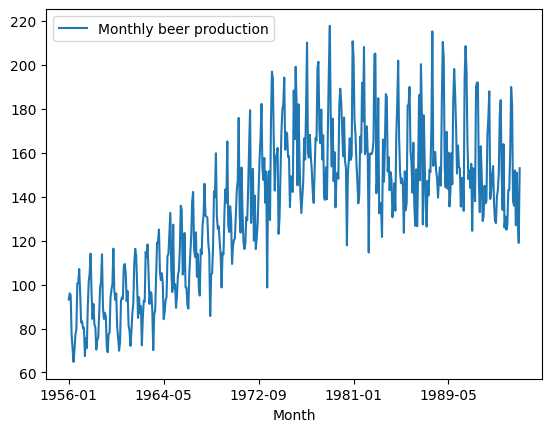

In [45]:
bp = pd.read_csv('monthly-beer-production-in-austr.csv', index_col=0)
y = bp['Monthly beer production']
bp.plot()

In [17]:
y_train = y[:-24]
y_test = y[-24:]
y_train.shape, y_test.shape

((452,), (24,))

<Axes: xlabel='Month'>

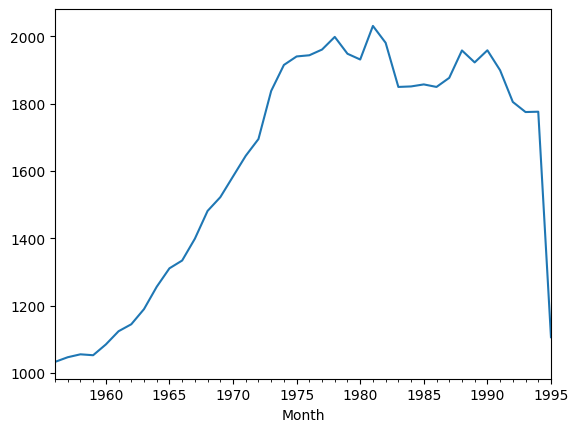

In [18]:
y.index = pd.DatetimeIndex(y.index)
y = y.resample('YE').sum()
y.plot()

In [19]:
from statsmodels.tsa.api import ExponentialSmoothing

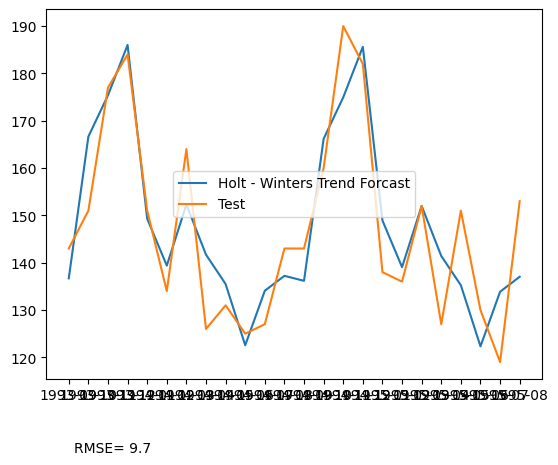

In [39]:
# Damped + Holt-Winters Additive
alpha, beta, gamma = 0.1,0.2,0.1

holt_winters = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='add',
                                    damped_trend=True)

fit = holt_winters.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal= gamma)
fcast = fit.forecast(len(y_test))

holt_winters_fcast = pd.Series(fcast, index= y_test.index)

plt.plot(holt_winters_fcast, label = 'Holt - Winters Trend Forcast')
plt.plot(y_test, label = 'Test')
error = round(root_mean_squared_error(y_test, holt_winters_fcast),2)
plt.text(0.25, 100, 'RMSE= '+str(error))
plt.legend(loc = 'best')
plt.show()

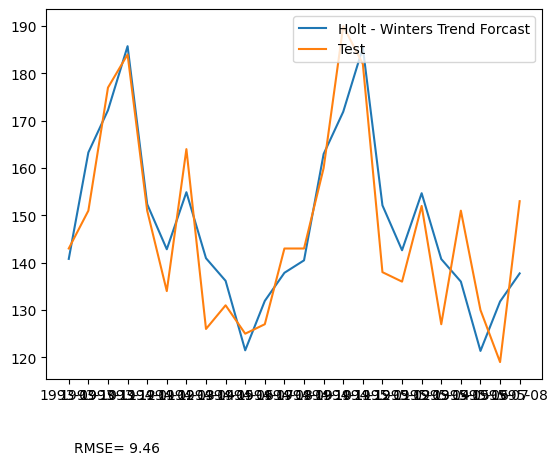

In [43]:
# Damped + Holt-Winters Multiplicative

alpha, beta, gamma = 0.1,0.2,0.01
holt_winters = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='mul',
                                    damped_trend=True)
fit = holt_winters.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal= gamma)
fcast = fit.forecast(len(y_test))

holt_winters_fcast = pd.Series(fcast, index= y_test.index)

plt.plot(holt_winters_fcast, label = 'Holt - Winters Trend Forcast')
plt.plot(y_test, label = 'Test')

error = round(root_mean_squared_error(y_test, holt_winters_fcast),2)
plt.text(0.25, 100, 'RMSE= '+str(error))
plt.legend(loc = 'best')
plt.show()

In [37]:
holt_winters.params

{'smoothing_level': 0.07945250809468249,
 'smoothing_trend': 0.07945249450077209,
 'smoothing_seasonal': 4.1050064348924e-06,
 'damping_trend': 0.9810898174137191,
 'initial_level': 60.68189459305677,
 'initial_trend': 0.0807475053397876,
 'initial_seasons': array([1.45247077, 1.36029774, 1.47559108, 1.34213975, 1.2974562 ,
        1.15803168, 1.26010471, 1.31742885, 1.34106224, 1.55370508,
        1.64006595, 1.76724395]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

## Box-Cox Transforamtion

In [46]:
from scipy.special import boxcox, inv_boxcox
lamb = 0.1
y = bp['Monthly beer production']
y_trans = boxcox(y, lamb)
y_t3

NameError: name 'y_t3' is not defined